# FIT 5196 Assignment 3

**Student Name: Akshay Sapra**

**Student ID: 29858186**

Date: 12/06/2019

Environment: 
- Python Version 3.7


Libraries Used: 
>- **matplotlib** to plot the chart.
>- **shapefile** to work on shp files.
>- **pandas** to work on dataframe.
>- **shapely** to work with pyshp to identify if point eexists in region.
>- **math** (sin, cos, sqrt, atan2, radians) to calculate Haversine formula.
>- **numpy** to work on Series.
>- **datetime** to work on time and date
>- **re** to work with regular expressions
>- **sns** to plot interactive graphs
>- **sklearn** to work with models and transformations.


## Introduction

This project comprise of 2 main task with initial task is to mine the data and integrate from different data sources and then transform/standardis the data in order to make it efficient to work on Predictive models primarily being Linear model

Files Used: 
>- GTFS files containing data of Public Transport in Vitoria
>- Suburb boundary/Shape files to identify the Suburbs in Victoria
>- Crime Statistics file to identify the crime committed in last few years.
>- Councils file to map the council to the local government
>- Property data containing the data of property

#### Steps Carried out in this project:
1. Read all the shape files and peform the necessary validations.
2. Read the property file (29858186.csv) and peform the necessary validations.
3. Read Councils file and perform all the necessary validations.
4. Read the Crime file and perform all the necessary validations.
5. Read all the GTS files and perform all the necessary validations.
6. Integrate the data into a new dataframe.
7. Fixing Data if any and then storing it into output file.

## Import Libraries

In [191]:
import shapefile # to work with shape file 
import pandas as pd # to work with data frame
from shapely.geometry import Point # to identify suburbs from shape file 
from shapely.geometry import shape # to identify suburbs from shape file 
from math import sin, cos, sqrt, atan2, radians # to calculate Haversine formula.
import numpy as np # To work with series
from datetime import datetime #to work with datetime
import re # to work with regular expression
import seaborn as sns # Seaborn visualization library
from sklearn import preprocessing #To work on transforming and scaling 
from sklearn.linear_model import LinearRegression # To develop a linear model
from sklearn.model_selection import train_test_split #split the dataset into training and test set
from sklearn.metrics import confusion_matrix, classification_report # for calculating accuracy and confusion matrix.
from matplotlib import pyplot as plt # To plot the graphs
import math # for log transformation
%matplotlib inline



## Loading the Shape File

In [192]:
sf = shapefile.Reader("./shape files/VIC_LOCALITY_POLYGON_shp") # note, no suffix, all 3 files are used


In [193]:
# Loading the records and shapes from the shape file 
recs = sf.records()
shapes = sf.shapes()
recs

[Record #0: ['6670', datetime.date(2011, 8, 31), None, 'VIC2615', datetime.date(2012, 4, 27), None, 'UNDERBOOL', '', '', 'G', None, '2'],
 Record #1: ['6671', datetime.date(2011, 8, 31), None, 'VIC1986', datetime.date(2012, 4, 27), None, 'NURRAN', '', '', 'G', None, '2'],
 Record #2: ['6672', datetime.date(2011, 8, 31), None, 'VIC2862', datetime.date(2012, 4, 27), None, 'WOORNDOO', '', '', 'G', None, '2'],
 Record #3: ['6673', datetime.date(2011, 8, 31), None, 'VIC734', datetime.date(2017, 8, 9), None, 'DEPTFORD', '', '', 'G', None, '2'],
 Record #4: ['6674', datetime.date(2011, 8, 31), None, 'VIC2900', datetime.date(2012, 4, 27), None, 'YANAC', '', '', 'G', None, '2'],
 Record #5: ['6405', datetime.date(2011, 8, 31), None, 'VIC1688', datetime.date(2012, 4, 27), None, 'MINIMAY', '', '', 'G', None, '2'],
 Record #6: ['6451', datetime.date(2011, 8, 31), None, 'VIC999', datetime.date(2012, 4, 27), None, 'GLEN FORBES', '', '', 'G', None, '2'],
 Record #7: ['6452', datetime.date(2011, 8, 31

In [194]:
#Checking the Number of records
len(shapes),len(recs)

(2973, 2973)

## Loading the Housing File

In [195]:
df = pd.read_csv('29858186.csv')
df.head()

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID850321692,46/121 Rathdowne St,3,u,735000.0,3/12/2016,1.0,2.0,3455.0,129.0,-37.80420,144.96910
1,ID658162778,6 Gray La,3,h,2035000.0,29/04/2017,1.0,1.0,185.0,129.0,-37.84350,144.95380
2,ID172575296,12 Borrie St,3,h,703000.0,18/06/2016,2.0,1.0,597.0,59.0,-37.70660,145.02030
3,ID253601222,47 Churchill Wy,3,h,710000.0,19/08/2017,1.0,2.0,837.0,59.0,-37.79682,145.30467
4,ID201623150,20a Park Rd,3,h,1100000.0,14/05/2016,1.0,1.0,111.0,18.0,-37.85250,145.00710


Checking for duplicacy in data 

In [196]:
df[df.duplicated()]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
188,ID782819853,71 Carlisle St,3,h,1030000.0,28/05/2016,1.0,1.0,292.0,11.0,-37.86770,144.98400
222,ID755557751,4 Raymond St,4,h,840000.0,30/07/2016,1.0,2.0,390.0,69.0,-37.73950,144.98430
291,ID315228441,14 Knight St,3,h,1195000.0,19/11/2016,2.0,2.0,496.0,94.0,-37.75590,144.89910
336,ID872012979,804/2 Claremont St,2,u,460000.0,22/07/2017,2.0,0.0,0.0,5.0,-37.83863,144.99379
406,ID917954022,11 Leura Ct,3,h,627000.0,22/07/2017,1.0,2.0,573.0,59.0,-37.69148,144.89873
407,ID776083809,205/15 Pickles St,2,u,600000.0,29/04/2017,1.0,1.0,0.0,14.0,-37.84430,144.94420
461,ID325820023,95 Bank St,2,h,1151000.0,23/09/2017,1.0,0.0,128.0,129.0,-37.83281,144.96633
468,ID757670073,19 Newry St,3,h,1320000.0,28/05/2016,1.0,0.0,365.0,5.0,-37.85540,145.00010
485,ID658147215,190 Gore St,2,h,1440000.0,17/09/2016,1.0,0.0,95.0,129.0,-37.80320,144.98250
493,ID873737507,23 Henry St,3,h,1200000.0,22/08/2016,1.0,1.0,374.0,7.0,-37.80570,144.88820


As duplicate records are irrelevant for the task, I will remove the records

In [197]:
df= df.drop_duplicates()
df

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude
0,ID850321692,46/121 Rathdowne St,3,u,735000.0,3/12/2016,1.0,2.0,3455.0,129.0,-37.80420,144.96910
1,ID658162778,6 Gray La,3,h,2035000.0,29/04/2017,1.0,1.0,185.0,129.0,-37.84350,144.95380
2,ID172575296,12 Borrie St,3,h,703000.0,18/06/2016,2.0,1.0,597.0,59.0,-37.70660,145.02030
3,ID253601222,47 Churchill Wy,3,h,710000.0,19/08/2017,1.0,2.0,837.0,59.0,-37.79682,145.30467
4,ID201623150,20a Park Rd,3,h,1100000.0,14/05/2016,1.0,1.0,111.0,18.0,-37.85250,145.00710
5,ID505471226,67 Celia St,4,h,1700000.0,15/10/2016,3.0,1.0,650.0,73.0,-37.85810,145.07800
6,ID242237920,4/12 Woodlawn St,2,u,717000.0,24/06/2017,1.0,0.0,316.0,49.0,-37.82295,144.99146
7,ID742541568,15 Gould St,3,h,2400000.0,10/09/2016,2.0,2.0,835.0,109.0,-37.92250,144.99100
8,ID193655835,142 Balwyn Rd,2,h,1850000.0,6/08/2016,1.0,1.0,1015.0,89.0,-37.80740,145.08260
9,ID640244599,3 Brian St,3,h,660000.0,8/04/2017,1.0,2.0,585.0,59.0,-37.69500,144.96760


Checking the information summary of the data frame

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 0 to 699
Data columns (total 12 columns):
ID            681 non-null object
Address       681 non-null object
Rooms         681 non-null int64
Type          681 non-null object
Price         681 non-null float64
Date          681 non-null object
Bathroom      681 non-null float64
Car           681 non-null float64
Landsize      681 non-null float64
Age           681 non-null float64
Lattitude     681 non-null float64
Longtitude    681 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 69.2+ KB


As One can see that there are no null object in the data and datatype is also correct I will proceed to extract the next file

## Loading the councils file

In [199]:
#Reading the data from council file
with open ("councils.txt") as f:
    read_data=f.read().split('\n')

In [200]:
#Exploring the data loaded from the council file
read_data[0:5]

["BANYULE : ['Abbotsford', 'Airport West', 'Albert Park', 'Alphington']",
 "BRIMBANK : ['Altona', 'Altona North', 'Armadale', 'Ascot Vale']",
 "DAREBIN : ['Ashburton', 'Ashwood', 'Avondale Heights', 'Balaclava']",
 "HOBSONS BAY : ['Balwyn', 'Balwyn North', 'Bentleigh', 'Bentleigh East']",
 "HUME : ['Box Hill', 'Braybrook', 'Brighton', 'Brighton East']"]

After exploring it was evident that file was not accesible to be used for merging. Therefore In order to make this file accesible and usable I have performed *below* opeations to convert the data into dictionary with list as its values.

In [201]:
council={}
for i in range(len(read_data)-1):
    council[read_data[i].split(' : ')[0]]=read_data[i].split(' : ')[1]
for each in council:
    council[each]=council[each][1:-1].split(", ")
    for eacher in range(len(council[each])):
        council[each][eacher]= re.sub("'",'',str(council[each][eacher]))
        council[each][eacher]=council[each][eacher].lower()

In [202]:
#Exploring the final data
council

{'BANYULE': ['abbotsford', 'airport west', 'albert park', 'alphington'],
 'BRIMBANK': ['altona', 'altona north', 'armadale', 'ascot vale'],
 'DAREBIN': ['ashburton', 'ashwood', 'avondale heights', 'balaclava'],
 'HOBSONS BAY': ['balwyn', 'balwyn north', 'bentleigh', 'bentleigh east'],
 'HUME': ['box hill', 'braybrook', 'brighton', 'brighton east'],
 'MARIBYRNONG': ['brunswick', 'brunswick west', 'bulleen', 'burwood'],
 'MELBOURNE': ['camberwell', 'canterbury', 'carlton north', 'carnegie'],
 'MELTON': ['caulfield', 'caulfield north', 'caulfield south', 'chadstone'],
 'MOONEE VALLEY': ['clifton hill', 'coburg', 'coburg north', 'collingwood'],
 'MORELAND': ['doncaster', 'eaglemont', 'elsternwick', 'elwood'],
 'NILLUMBIK': ['essendon', 'essendon north', 'fairfield', 'fitzroy'],
 'WHITTLESEA': ['fitzroy north', 'flemington', 'footscray', 'glen iris'],
 'WYNDHAM': ['glenroy', 'gowanbrae', 'hadfield', 'hampton'],
 'YARRA': ['hampton east',
  'hawthorn',
  'heidelberg heights',
  'heidelberg w

## Loading Crimebylocation file

Parameters to read the excel was tuned after reading the file file without them and exploring on to it.

In [203]:
# read the file
crime= pd.read_excel("crimebylocationdatatable-yearending31march2016.xlsx", sheet_name='Table 1',header=19,usecols="B:J")
crime

,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP
0,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A10 Homicide and related offences,4,123600,5632521
1,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A20 Assault and related offences,568,123600,5632521
2,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A30 Sexual offences,132,123600,5632521
3,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A40 Abduction and related offences,12,123600,5632521
4,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A50 Robbery,46,123600,5632521
5,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A60 Blackmail and extortion,2,123600,5632521
6,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",148,123600,5632521
7,2012,1 North West Metro,BANYULE,BANYULE,A Crimes against the person,A80 Dangerous and negligent acts endangering p...,75,123600,5632521
8,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B10 Arson,53,123600,5632521
9,2012,1 North West Metro,BANYULE,BANYULE,B Property and deception offences,B20 Property damage,938,123600,5632521


Checking for the duplicate records in the file.

In [204]:
crime[crime.duplicated()]

,Apr - Mar reference period,Police Region,Police Service Area,Local Government Area,CSA Offence Division,CSA Offence Subdivision,Offence Count,LGA ERP,Victorian ERP


Checking if any null value exists in the data type 

In [205]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9085 entries, 0 to 9084
Data columns (total 9 columns):
Apr - Mar reference period    9085 non-null int64
Police Region                 9085 non-null object
Police Service Area           9085 non-null object
Local Government Area         9085 non-null object
CSA Offence Division          9085 non-null object
CSA Offence Subdivision       9085 non-null object
Offence Count                 9085 non-null int64
LGA ERP                       9085 non-null int64
Victorian ERP                 9085 non-null int64
dtypes: int64(4), object(5)
memory usage: 638.9+ KB


## Reading GTFS file 

I have taken 1,2 & 10 folders from GTFS dataset as it contain Train Data.

To avoid duplicates, I have used merged method with outer join to join all the files from 1,2 & 10 folder for each type of file.

In [206]:
#To avoid duplicates, I have used merged method with outer join to join all the files from 1,2 & 10 folder for each type of file.
gt_calendar_1 = pd.read_csv('./1/calendar.txt')
gt_calendar_2 = pd.read_csv('./2/calendar.txt')
gt_calendar_10 = pd.read_csv('./10/calendar.txt')

gt_calendar= pd.merge (gt_calendar_1,pd.merge(gt_calendar_2,gt_calendar_10,how = 'outer'),how = 'outer')
gt_calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,UR,0,0,0,1,0,0,0,20190509,20190509
1,T6,0,0,0,0,1,0,0,20190510,20190510
2,T2,0,0,0,0,0,1,0,20190511,20190511
3,UJ,0,0,0,0,0,0,1,20190512,20190512
4,UO,1,0,0,0,0,0,0,20190513,20190513


In [207]:
#To avoid duplicates, I have used merged method with outer join to join all the files from 1,2 & 10 folder for each type of file.
gt_calendar_text_1 = pd.read_csv('./1/calendar_dates.txt')
gt_calendar_text_2 = pd.read_csv('./2/calendar_dates.txt')
gt_calendar_text_10 = pd.read_csv('./10/calendar_dates.txt')

gt_calendar_dates= pd.merge (gt_calendar_text_1,pd.merge(gt_calendar_text_2,gt_calendar_text_10,how = 'outer'),how = 'outer')
gt_calendar_dates.head()

,service_id,date,exception_type
0,T0_2,20190610,2
1,T0+lm_2,20190610,2
2,T0+pr_2,20190610,2
3,UW,20190617,2
4,UW,20190624,2


In [208]:
#To avoid duplicates, I have used merged method with outer join to join all the files from 1,2 & 10 folder for each type of file.
gt_shapes_1 = pd.read_csv('./1/shapes.txt')
gt_shapes_2 = pd.read_csv('./2/shapes.txt')
gt_shapes_10 = pd.read_csv('./10/shapes.txt')

gt_shapes= pd.merge (gt_shapes_1,pd.merge(gt_shapes_2,gt_shapes_10,how = 'outer'),how = 'outer')
gt_shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,1-Ech-A-mjp-1.1.H,-36.131004,144.753202,1,0.000000
1,1-Ech-A-mjp-1.1.H,-36.144736,144.754833,2,1530.857276
2,1-Ech-A-mjp-1.1.H,-36.152416,144.755826,3,2387.817602
3,1-Ech-A-mjp-1.1.H,-36.154403,144.756047,4,2609.233500
4,1-Ech-A-mjp-1.1.H,-36.155712,144.756154,5,2754.815092


In [209]:
#To avoid duplicates, I have used merged method with outer join to join all the files from 1,2 & 10 folder for each type of file.
gt_stop_times_1 = pd.read_csv('./1/stop_times.txt')
gt_stop_times_2 = pd.read_csv('./2/stop_times.txt')
gt_stop_times_10 = pd.read_csv('./10/stop_times.txt')

gt_stop_times= pd.merge (gt_stop_times_1,pd.merge(gt_stop_times_2,gt_stop_times_10,how = 'outer'),how = 'outer')
gt_stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,7548.UR.1-V08-A-mjp-1.1.H,06:08:00,06:08:00,20291,1,NaN,0,0,0.000000
1,7548.UR.1-V08-A-mjp-1.1.H,06:42:00,06:42:00,20346,2,NaN,0,0,52720.840026
2,7548.UR.1-V08-A-mjp-1.1.H,06:55:00,06:57:00,20341,3,NaN,0,0,68786.649688
3,7548.UR.1-V08-A-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171
4,7548.UR.1-V08-A-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301


In [210]:
#To avoid duplicates, I have used merged method with outer join to join all the files from 1,2 & 10 folder for each type of file.
gt_stops_1 = pd.read_csv('./1/stops.txt')
gt_stops_2 = pd.read_csv('./2/stops.txt')
gt_stops_10 = pd.read_csv('./10/stops.txt')

gt_stops= pd.merge (gt_stops_1,pd.merge(gt_stops_2,gt_stops_10,how = 'outer'),how = 'outer')
gt_stops.head()

,stop_id,stop_name,stop_lat,stop_lon
0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372
1,19980,Melton Railway Station (Melton South),-37.703293,144.572524
2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631
3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304
4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165


In [211]:
#To avoid duplicates, I have used merged method with outer join to join all the files from 1,2 & 10 folder for each type of file.
gt_trips_1 = pd.read_csv('./1/trips.txt')
gt_trips_2 = pd.read_csv('./2/trips.txt')
gt_trips_10 = pd.read_csv('./10/trips.txt')

gt_trips= pd.merge (gt_trips_1,pd.merge(gt_trips_2,gt_trips_10,how = 'outer'),how = 'outer')
gt_trips.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0
1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
2,1-V08-G-mjp-1,T0,1053.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
3,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1
4,1-V08-G-mjp-1,T0,1523.T0.1-V08-G-mjp-1.5.R,1-V08-G-mjp-1.5.R,Bairnsdale,1


## Integrating the Data into new Data Frame 

##### Column ID, Address, Price, Type, Date, Rooms, Bathroom, Car, LandSize, Age, Latitude & Longitude
According to the description aforementioned columns are required as final columns of the property dataset. And as they are present together in the df, I chose to simply copy these columns into a new data frame after identifying all the columns. 

##### Column Suburb


As Suburb is present in shape file, so in order to integrate the suburb to the peoperty data below code is written

In [212]:
#Method to check if latitude and longitude are in the shape/polygon of the suburb shape file
def find_sub(lat,long):
    pt=(long,lat)
    for i in range(len(shapes)):
        if Point(pt).within(shape(shapes[i])):
            return recs[i][6]
    return "WARRNAMBOOL"


df["Suburb"]=df.apply(lambda x: find_sub(x['Lattitude'],x['Longtitude']),axis=1)
#https://gis.stackexchange.com/questions/250172/finding-out-if-coordinate-is-within-shapefile-shp-using-pyshp

Suburb are loaded into the property df now. I will check if suburb is loaded properly and confirm if any Suburb is left out.

In [213]:
df.head()
df[df['Suburb'].isna()]

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb


##### Column "Train_station_id" and "distance_to_train_stat"

As per the requirement posted on forum I have identified the nearest train station which, from which train goes to Souther Cross every weekday between 7-9.30 am. 

To simplify the complexity, I have identified the column in simple steps 

>###### Step 1. Identify all the services that runs on all the weekdays

In [214]:
service_ids_weekdays= gt_calendar[(gt_calendar['monday']==1)&(gt_calendar['tuesday']==1)&(gt_calendar['wednesday']==1)&(gt_calendar['thursday']==1)& (gt_calendar['friday']==1)]['service_id']
#Storing all the service ids as series in service_ids_weekdays variable.

gt_calendar[(gt_calendar['monday']==1)&(gt_calendar['tuesday']==1)&(gt_calendar['wednesday']==1)&(gt_calendar['thursday']==1)& (gt_calendar['friday']==1)]
#Services that runs on weekdays

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
6,T0,1,1,1,1,1,0,0,20190515,20190523
13,T0_1,1,1,1,1,1,0,0,20190530,20190606
16,T0_2,1,1,1,1,1,0,0,20190607,20190628
20,T0_3,1,1,1,1,1,0,0,20190629,20190810
51,T0,1,1,1,1,1,0,0,20190524,20190810


>###### Step 2. Identify all the Trips that service IDs which run on weekdays

In [215]:
trips_on_weekdays=gt_trips[(gt_trips['service_id'].isin(set(service_ids_weekdays)))]['trip_id']
#Storing all the trip ids as series in trips_on_weekdays variable.

gt_trips[(gt_trips['service_id'].isin(set(service_ids_weekdays)))].head()
#trips that runs on weekdays

#https://stackoverflow.com/questions/18250298/how-to-check-if-a-value-is-in-the-list-in-selection-from-pandas-data-frame

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,1-V08-G-mjp-1,T0,1051.T0.1-V08-G-mjp-1.1.H,1-V08-G-mjp-1.1.H,Melbourne,0
1,1-V08-G-mjp-1,T0,1052.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
2,1-V08-G-mjp-1,T0,1053.T0.1-V08-G-mjp-1.2.H,1-V08-G-mjp-1.2.H,Melbourne,0
3,1-V08-G-mjp-1,T0,1522.T0.1-V08-G-mjp-1.4.R,1-V08-G-mjp-1.4.R,Bairnsdale,1
4,1-V08-G-mjp-1,T0,1523.T0.1-V08-G-mjp-1.5.R,1-V08-G-mjp-1.5.R,Bairnsdale,1


>###### Step 3. Identify all the trips that has route on all the weekdays and train also goes from/to Southern Cross Station

In [216]:
trip_weekdays_goes_SC= gt_stop_times[(gt_stop_times['trip_id'].isin(set(trips_on_weekdays)))& (gt_stop_times['stop_id'].isin(['20043','22180']))]['trip_id']
#Storing all the trip ids as series in trip_weekdays_goes_SC variable.

gt_stop_times[(gt_stop_times['trip_id'].isin(set(trips_on_weekdays)))& (gt_stop_times['stop_id'].isin(['20043','22180']))]
# trains that goes to/ from southern cross

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
593,1051.T0.1-V08-G-mjp-1.1.H,09:57:00,09:57:00,20043,23,NaN,0,0,276418.501534
688,1052.T0.1-V08-G-mjp-1.2.H,16:35:00,16:35:00,20043,23,NaN,0,0,276418.501534
703,1053.T0.1-V08-G-mjp-1.2.H,22:08:00,22:08:00,20043,23,NaN,0,0,276418.501534
725,1522.T0.1-V08-G-mjp-1.4.R,07:20:00,07:20:00,20043,1,NaN,0,0,0.000000
740,1523.T0.1-V08-G-mjp-1.5.R,13:20:00,13:20:00,20043,1,NaN,0,0,0.000000
757,1524.T0.1-V08-G-mjp-1.6.R,18:34:00,18:34:00,20043,1,NaN,0,0,0.000000
1279,4394.T0.1-V08-J-mjp-1.1.H,09:57:00,09:57:00,20043,23,NaN,0,0,276418.501534
1374,4395.T0.1-V08-J-mjp-1.2.H,16:35:00,16:35:00,20043,23,NaN,0,0,276418.501534
1389,4396.T0.1-V08-J-mjp-1.2.H,22:08:00,22:08:00,20043,23,NaN,0,0,276418.501534
1411,4865.T0.1-V08-J-mjp-1.4.R,07:20:00,07:20:00,20043,1,NaN,0,0,0.000000


>###### Step 4. Making copy of all the routes  that has a service on all the weekdays and train also goes from/to Southern Cross Station

In [217]:
filt1_gt_stop_times =gt_stop_times[(gt_stop_times['trip_id'].isin(set(trip_weekdays_goes_SC)))].copy()
# Storing all the routes that has a service on all the weekdays and train also goes from/to Southern Cross Station in filt1_gt_stop_times
filt1_gt_stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
578,1051.T0.1-V08-G-mjp-1.1.H,06:08:00,06:08:00,20291,1,NaN,0,0,0.000000
579,1051.T0.1-V08-G-mjp-1.1.H,06:42:00,06:42:00,20346,2,NaN,0,0,52720.840026
580,1051.T0.1-V08-G-mjp-1.1.H,06:55:00,06:57:00,20341,3,NaN,0,0,68786.649688
581,1051.T0.1-V08-G-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171
582,1051.T0.1-V08-G-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301
583,1051.T0.1-V08-G-mjp-1.1.H,07:45:00,07:45:00,20330,6,NaN,0,0,130530.089787
584,1051.T0.1-V08-G-mjp-1.1.H,07:57:00,07:57:00,20328,7,NaN,0,0,145000.117101
585,1051.T0.1-V08-G-mjp-1.1.H,08:16:00,08:16:00,20357,10,NaN,0,0,175519.536474
586,1051.T0.1-V08-G-mjp-1.1.H,08:23:00,08:23:00,20308,11,NaN,0,0,183185.641193
587,1051.T0.1-V08-G-mjp-1.1.H,08:36:00,08:36:00,20313,14,NaN,0,0,200482.793316


>###### Step 5. Identifying the stop sequence of Southern cross for each trip as a new column

In [218]:
def calc_seq_1(trip):
    d1=filt1_gt_stop_times[(filt1_gt_stop_times['trip_id']==trip)&(filt1_gt_stop_times['stop_id']==20043)]['stop_sequence']
    d2=filt1_gt_stop_times[(filt1_gt_stop_times['trip_id']==trip)&(filt1_gt_stop_times['stop_id']==22180)]['stop_sequence']
    if (not d1.empty) and (not d2.empty):
        return min(int(d1),int(d2))
    if d1.empty:
        return int(d2)
    if d2.empty:
        return int(d1)

filt1_gt_stop_times['SC_seq']= filt1_gt_stop_times['trip_id'].apply(calc_seq_1)

filt1_gt_stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,SC_seq
578,1051.T0.1-V08-G-mjp-1.1.H,06:08:00,06:08:00,20291,1,NaN,0,0,0.000000,23
579,1051.T0.1-V08-G-mjp-1.1.H,06:42:00,06:42:00,20346,2,NaN,0,0,52720.840026,23
580,1051.T0.1-V08-G-mjp-1.1.H,06:55:00,06:57:00,20341,3,NaN,0,0,68786.649688,23
581,1051.T0.1-V08-G-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171,23
582,1051.T0.1-V08-G-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301,23
583,1051.T0.1-V08-G-mjp-1.1.H,07:45:00,07:45:00,20330,6,NaN,0,0,130530.089787,23
584,1051.T0.1-V08-G-mjp-1.1.H,07:57:00,07:57:00,20328,7,NaN,0,0,145000.117101,23
585,1051.T0.1-V08-G-mjp-1.1.H,08:16:00,08:16:00,20357,10,NaN,0,0,175519.536474,23
586,1051.T0.1-V08-G-mjp-1.1.H,08:23:00,08:23:00,20308,11,NaN,0,0,183185.641193,23
587,1051.T0.1-V08-G-mjp-1.1.H,08:36:00,08:36:00,20313,14,NaN,0,0,200482.793316,23


>###### Step 6. Identifying all the stops that goes to Southern cross station between 7-9.30 am

In [219]:
stop_dep_time_stop_seq=filt1_gt_stop_times[(filt1_gt_stop_times["departure_time"]<'09:30')&(filt1_gt_stop_times["departure_time"]>'07:00')&(filt1_gt_stop_times['stop_sequence']<filt1_gt_stop_times['SC_seq'])]['stop_id']
# All the stops are stored in the stop_dep_time_stop_seq variable from where Train goes to Souther cross on all the weekdays between 7-9.30 am
filt2_gt_stop_times= filt1_gt_stop_times[(filt1_gt_stop_times["departure_time"]<'09:30')&(filt1_gt_stop_times["departure_time"]>'07:00')&(filt1_gt_stop_times['stop_sequence']<filt1_gt_stop_times['SC_seq'])].copy()
#Filtering the same in stops data
filt1_gt_stop_times[(filt1_gt_stop_times["departure_time"]<'09:30')&(filt1_gt_stop_times["departure_time"]>'07:00')&(filt1_gt_stop_times['stop_sequence']<filt1_gt_stop_times['SC_seq'])]
#Displaying the data

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,SC_seq
581,1051.T0.1-V08-G-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171,23
582,1051.T0.1-V08-G-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301,23
583,1051.T0.1-V08-G-mjp-1.1.H,07:45:00,07:45:00,20330,6,NaN,0,0,130530.089787,23
584,1051.T0.1-V08-G-mjp-1.1.H,07:57:00,07:57:00,20328,7,NaN,0,0,145000.117101,23
585,1051.T0.1-V08-G-mjp-1.1.H,08:16:00,08:16:00,20357,10,NaN,0,0,175519.536474,23
586,1051.T0.1-V08-G-mjp-1.1.H,08:23:00,08:23:00,20308,11,NaN,0,0,183185.641193,23
587,1051.T0.1-V08-G-mjp-1.1.H,08:36:00,08:36:00,20313,14,NaN,0,0,200482.793316,23
588,1051.T0.1-V08-G-mjp-1.1.H,08:51:00,08:51:00,22252,17,NaN,0,0,217165.027900,23
589,1051.T0.1-V08-G-mjp-1.1.H,09:09:00,09:09:00,22250,18,NaN,1,0,244167.376904,23
1267,4394.T0.1-V08-J-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171,23


>###### Step 7. Creating a Data frame of all such stops and finding the nearest stop from the property

In [220]:
stop_dep_time_stop_seq=set(stop_dep_time_stop_seq)
filtered_Stops= gt_stops[gt_stops['stop_id'].isin (set(stop_dep_time_stop_seq))].copy()
filtered_Stops.head()

,stop_id,stop_name,stop_lat,stop_lon
0,17204,Wallan Railway Station (Wallan),-37.416861,145.005372
1,19980,Melton Railway Station (Melton South),-37.703293,144.572524
2,19981,Rockbank Railway Station (Rockbank),-37.729261,144.650631
3,19982,Deer Park Railway Station (Deer Park),-37.777764,144.772304
4,19998,Sunbury Railway Station (Sunbury),-37.579206,144.728165


Adding southern cross stations to filtered stations

In [221]:
filtered_Stops=pd.merge(filtered_Stops,gt_stops[(gt_stops['stop_id']==20043)|(gt_stops['stop_id']==22180)],how='outer')

>##### Step 8. Calculating the minimum distance from filtered station to the property and storing it into a new column

In [222]:
#Using Haversine Formula to caluate the Euceledian distance between the points and storing them
R = 6378.0
def calc_station_dist (lat, long):
    global R
    lat=radians(lat)
    long=radians(long)
    dist=[]
    stat=0
    least_dist=0
    for index, row in filtered_Stops.iterrows():
        #Haversine Formula
        dest_lat=radians(row['stop_lat'])
        dest_long=radians(row['stop_lon'])
        dlon=dest_long-long
        dlat=dest_lat-lat
        a = sin(dlat / 2)**2 + cos(lat) * cos(dest_lat) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = R * c* 1000
        dist.append(distance)
        if distance==min(dist):
            least_dist= round(distance,2)
            stat=row['stop_id']
    return (least_dist,stat)    
    
df['new_col']=df.apply(lambda x: calc_station_dist(x['Lattitude'],x['Longtitude']),axis=1)
#https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
#https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

> Final Step.Spliting and storing **distance_to_train_stat** & **train_station_id** columns

In [223]:
df['distance_to_train_stat']=df['new_col'].str[0]
df['train_station_id']=df['new_col'].str[1]
df =df.drop(columns='new_col')
df

,ID,Address,Rooms,Type,Price,Date,Bathroom,Car,Landsize,Age,Lattitude,Longtitude,Suburb,distance_to_train_stat,train_station_id
0,ID850321692,46/121 Rathdowne St,3,u,735000.0,3/12/2016,1.0,2.0,3455.0,129.0,-37.80420,144.96910,CARLTON,833.35,19843
1,ID658162778,6 Gray La,3,h,2035000.0,29/04/2017,1.0,1.0,185.0,129.0,-37.84350,144.95380,ALBERT PARK,2803.62,20043
2,ID172575296,12 Borrie St,3,h,703000.0,18/06/2016,2.0,1.0,597.0,59.0,-37.70660,145.02030,RESERVOIR,960.59,20009
3,ID253601222,47 Churchill Wy,3,h,710000.0,19/08/2017,1.0,2.0,837.0,59.0,-37.79682,145.30467,KILSYTH,1506.08,19877
4,ID201623150,20a Park Rd,3,h,1100000.0,14/05/2016,1.0,1.0,111.0,18.0,-37.85250,145.00710,PRAHRAN,628.54,19946
5,ID505471226,67 Celia St,4,h,1700000.0,15/10/2016,3.0,1.0,650.0,73.0,-37.85810,145.07800,GLEN IRIS,521.26,19848
6,ID242237920,4/12 Woodlawn St,2,u,717000.0,24/06/2017,1.0,0.0,316.0,49.0,-37.82295,144.99146,RICHMOND,169.26,19908
7,ID742541568,15 Gould St,3,h,2400000.0,10/09/2016,2.0,2.0,835.0,109.0,-37.92250,144.99100,BRIGHTON,472.23,19950
8,ID193655835,142 Balwyn Rd,2,h,1850000.0,6/08/2016,1.0,1.0,1015.0,89.0,-37.80740,145.08260,BALWYN,1905.72,19893
9,ID640244599,3 Brian St,3,h,660000.0,8/04/2017,1.0,2.0,585.0,59.0,-37.69500,144.96760,FAWKNER,995.07,19961


##### Column travel_min_to_CBD

As the initial step to calculate this field, I have created new dataframe from the previous filtered data frames of stop_times file which filters data from 7 to 9.30 am and have a route to Southern Cross Station.

In [224]:
filt3_gt_stop_times=filt1_gt_stop_times[(filt1_gt_stop_times["stop_id"]==20043) |(filt1_gt_stop_times["stop_id"]==22180)].copy()
# Creating a new DF with the filter of time and SC station from stop_times file
time_calc_df= pd.merge(filt2_gt_stop_times,filt3_gt_stop_times,how ='outer')
time_calc_df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,SC_seq
0,1051.T0.1-V08-G-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171,23
1,1051.T0.1-V08-G-mjp-1.1.H,07:32:00,07:34:00,20351,5,NaN,0,0,116895.210301,23
2,1051.T0.1-V08-G-mjp-1.1.H,07:45:00,07:45:00,20330,6,NaN,0,0,130530.089787,23
3,1051.T0.1-V08-G-mjp-1.1.H,07:57:00,07:57:00,20328,7,NaN,0,0,145000.117101,23
4,1051.T0.1-V08-G-mjp-1.1.H,08:16:00,08:16:00,20357,10,NaN,0,0,175519.536474,23
5,1051.T0.1-V08-G-mjp-1.1.H,08:23:00,08:23:00,20308,11,NaN,0,0,183185.641193,23
6,1051.T0.1-V08-G-mjp-1.1.H,08:36:00,08:36:00,20313,14,NaN,0,0,200482.793316,23
7,1051.T0.1-V08-G-mjp-1.1.H,08:51:00,08:51:00,22252,17,NaN,0,0,217165.027900,23
8,1051.T0.1-V08-G-mjp-1.1.H,09:09:00,09:09:00,22250,18,NaN,1,0,244167.376904,23
9,4394.T0.1-V08-J-mjp-1.1.H,07:16:00,07:16:00,20339,4,NaN,0,0,94514.728171,23


Now for each row in the dataframe I have calculated the difference of time from the station closest to property to Southern Cros Station

In [ ]:
#Calculating minimum time
def calc_time(prop_station):
    travel_time=[]
    for index, row in time_calc_df.iterrows():
        if prop_station==row['stop_id']:
            dtime=row['departure_time']
            atime=time_calc_df[(time_calc_df['trip_id']==row['trip_id'])&((time_calc_df['stop_id']==20043)|(time_calc_df['stop_id']==22180))]['arrival_time'].values[0]
            if dtime[0:2]=='24':
                dtime ='00'+dtime[2:]
            if atime[0:2]=='24':
                atime ='00'+atime[2:]
            if dtime[0:2]=='25':
                dtime ='01'+dtime[2:]
            if atime[0:2]=='25':
                atime ='01'+atime[2:]
            #Fixing error of hours manually
            tt= datetime.strptime(atime,'%H:%M:%S')-datetime.strptime(dtime,'%H:%M:%S')
            travel_time.append(tt.seconds/60)
    return(np.mean(travel_time))

df['travel_min_to_CBD']= df['train_station_id'].apply(calc_time)
df

##### Column over_price? 

All the Price attributes are passed for each row to calculate the median price and compare if it is over priced or not.

In [ ]:
# creating a new column to store the year of currect date to make processing easier
df['new_date']=pd.to_datetime(df['Date']).dt.year

In [ ]:
#Passing all the Atrributes for each row to check if the price more than median
def price_check(price,bathroom,room,car,typ,suburb,date):
    filtered_price=df[(df['Bathroom']==bathroom)&(df['Rooms']==room)&(df['Car']==car)&(df['Type']==typ)&(df['Suburb']==suburb)&(df['new_date']==date)]['Price']
    if price>filtered_price.median():
        return 1
    else:
        return 0

df['over_priced?']= df.apply(lambda x: price_check(x['Price'],x['Bathroom'],x['Rooms'],x['Car'],x['Type'],x['Suburb'],x['new_date']),axis=1)
df

Validating if there is any property which is overpriced.

In [ ]:
df[df['over_priced?']==1]

###### Columns crime_A_average, crime_B_average & crime_C_average 

As the approach to all the column are very similar, I have grouped them togther. 

In [ ]:
def crime_A(Sub,Year):
    for each in council:
        #Council Data was stored as Dictionary, Therefore Each suburb is passed to check for the local government are
        if Sub.lower() in council[each]:
            local_gov=each
            break
    total_crime=crime[(crime['Local Government Area']==local_gov)&(crime['Apr - Mar reference period']>Year-4)&(crime['CSA Offence Division'].str.startswith("A"))]['Offence Count'].sum()
    return(total_crime/3)
    

df['crime_A_average']= df.apply(lambda x: crime_A(x['Suburb'],x['new_date']),axis=1)
df

In [ ]:
def crime_B(Sub,Year):
  
    for each in council:
        #Council Data was stored as Dictionary, Therefore Each suburb is passed to check for the local government are
        if Sub.lower() in council[each]:
            local_gov=each
            break
    total_crime=crime[(crime['Local Government Area']==local_gov)&(crime['Apr - Mar reference period']>Year-4)&(crime['CSA Offence Division'].str.startswith("B"))]['Offence Count'].sum()
    return(total_crime/3)
  
    

df['crime_B_average']= df.apply(lambda x: crime_B(x['Suburb'],x['new_date']),axis=1)
df

In [ ]:
def crime_C(Sub,Year):
#Council Data was stored as Dictionary, Therefore Each suburb is passed to check for the local government are  
    for each in council:
        if Sub.lower() in council[each]:
            local_gov=each
            break
        
    total_crime=crime[(crime['Local Government Area']==local_gov)&(crime['Apr - Mar reference period']>Year-4)&(crime['CSA Offence Division'].str.startswith("C"))]['Offence Count'].sum()
    return(total_crime/3)
  
    

df['crime_C_average']= df.apply(lambda x: crime_C(x['Suburb'],x['new_date']),axis=1)
df

##### Data Filtering

In [ ]:
final_df=df[["ID","Address","Suburb", "Price", "Type", "Date", "Rooms", "Bathroom", "Car", "Landsize", "Age", "Lattitude","Longtitude","train_station_id","distance_to_train_stat","travel_min_to_CBD","over_priced?","crime_A_average","crime_B_average","crime_C_average"]].copy()         

Resetting the index and writing the file to CSV

In [ ]:
final_df=final_df.reset_index(drop=True)
final_df= final_df.rename(columns={'Landsize': 'LandSize', 'Lattitude': 'Latitude','Longtitude': 'Longitude'})
final_df

In [ ]:
final_df.to_csv('29858186_solution.csv',index=False)

## Task 2

In order to do any Data Reshaping, I have created a new data frame to store the selected columns

In [ ]:
df_2=final_df[["Rooms","crime_C_average",'travel_min_to_CBD',"Age","Price"]].copy()

Now, In order to understand the distribution and corelation, I have plotted the pairplot between all the variables

In [ ]:
#default pairplot
sns.pairplot(df_2)

In the Above graph one can see that distribution of crime_C_average is **highly skewed and therefore there is a need for the Transformation** of this column (also evident from below boxplot). In this case I have opted to do Log transformation as it's distribution in in Thousands while other predictor have distribution in tens.Therefore I feel it should be used to reduce skew in data distribution.

In [ ]:
df_2.iloc[:,:-1].boxplot()
# df_2.boxplot()

#### *Investigating further:*

In [ ]:
df_2.describe()

It can be noticed that there is a vast difference between maximum and minimum of each of the predictors. Therefore to reduce that, I feel there is a need of **Max Min Normalisation** of data is required

## Data Reshaping

Now, In order to ensure the effect of my transformation I have used Linear model to find for R suare and MSE and keep them as the base for any improvement or detoriation .

- Below is the Linear model which gives R square of 0.22 and MSE of 283393283679 without any transformation or reshaping 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_2.iloc[:,:-1],df_2['Price'],test_size=0.20)
clf = LinearRegression().fit(X_train, y_train)
pred=clf.predict(X_test) # Predicting labels for test data

print('R square :'+str(metrics.r2_score(y_test, pred)))
print('MSE :'+str(metrics.mean_squared_error(y_test, pred)))


Also, Below is the corelation matrix to see the corelation between the columns

In [ ]:
df_2.corr()

## Data Transformation

#### Log Transformation of crime_C_Average column

In [ ]:
i = 0
for row in df_2.iterrows():
    if df_2["crime_C_average"][i]==0:
        df_2['crime_C_average'].at[i]=0
    else:
        df_2['crime_C_average'].at[i] = math.log(df_2["crime_C_average"][i])
    i += 1

    
df_2.head()

checking the corelation matrix again

In [ ]:
df_2.corr()

Checking the Linear model R-Square 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_2.iloc[:,:-1],df_2['Price'],test_size=0.20)
clf = LinearRegression().fit(X_train, y_train)
pred=clf.predict(X_test) # Predicting labels for test data

print('R square :'+str(metrics.r2_score(y_test, pred)))
print('MSE :'+str(metrics.mean_squared_error(y_test, pred)))


It is clear that Even with same dataset corelation between the predictor remains same but R-Square and MSE of the model improves with Transformation.

Now Experimenting further, I will try to implement the Max Min Normalisation on the data.

In [ ]:
minmax_scale = preprocessing.MinMaxScaler().fit(df_2.iloc[:,:-1])
df_minmax = minmax_scale.transform(df_2.iloc[:,:-1])
df_minmax[0:5]

Checking again by running the Linear Regression, We can see the further improvement in R-square and MSE of the model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_minmax,df_2['Price'],test_size=0.20)
clf = LinearRegression().fit(X_train, y_train)
pred=clf.predict(X_test) # Predicting labels for test data

print('R square :'+str(metrics.r2_score(y_test, pred)))
print('MSE :'+str(metrics.mean_squared_error(y_test, pred)))


## Evidence of further improvement by Scaling through graph

In [145]:
std_scale = preprocessing.StandardScaler().fit(df_2.iloc[:,:-1])
df_std = std_scale.transform(df_2.iloc[:,:-1]) # an array not a df
df_std[0:5]

array([[ 0.03841841, -1.12035546, -1.80053348,  1.96326879],
       [ 0.03841841, -0.08689768, -2.06289703,  1.96326879],
       [ 0.03841841, -0.67246475,  0.81414424,  0.08835175],
       [ 0.03841841, -1.06132931,  2.12323615,  0.08835175],
       [ 0.03841841, -0.22745994, -0.71207642, -1.00981395]])

In [147]:
# put it alongside data... to view
df_2['room_scaled'] = df_std[:,0] # so 'Ascaled' is Alcohol scaled
df_2['crime_C_average_scaled'] = df_std[:,1] # and 'MAscaled' is Malic acid scaled
df_2['travel_min_to_CBD_scaled'] = df_std[:,2] # so 'Ascaled' is Alcohol scaled
df_2['Age_scaled'] = df_std[:,3] # and 'MAscaled' is Malic acid scaled
df_2.head()

,Rooms,crime_C_average,travel_min_to_CBD,Age,Price,room_scaled,crime_C_average_scaled,travel_min_to_CBD_scaled,Age_scaled
0,3,10.333333,6.100559,129.0,735000.0,0.038418,-1.120355,-1.800533,1.963269
1,3,125.111111,3.180645,129.0,2035000.0,0.038418,-0.086898,-2.062897,1.963269
2,3,60.076923,35.200000,59.0,703000.0,0.038418,-0.672465,0.814144,0.088352
3,3,16.888889,49.769231,59.0,710000.0,0.038418,-1.061329,2.123236,0.088352
4,3,109.500000,18.214286,18.0,1100000.0,0.038418,-0.227460,-0.712076,-1.009814


In [148]:
df_2.describe()

,Rooms,crime_C_average,travel_min_to_CBD,Age,Price,room_scaled,crime_C_average_scaled,travel_min_to_CBD_scaled,Age_scaled
count,720.000000,720.000000,720.000000,720.000000,7.200000e+02,7.200000e+02,7.200000e+02,7.200000e+02,7.200000e+02
mean,2.962500,134.762131,26.139173,55.701389,1.065894e+06,1.363107e-16,-5.736152e-17,-2.721588e-16,9.375217e-17
std,0.976773,111.139100,11.137002,37.360939,5.963217e+05,1.000695e+00,1.000695e+00,1.000695e+00,1.000695e+00
min,1.000000,1.000000,3.180645,2.000000,2.220000e+05,-2.010564e+00,-1.204393e+00,-2.062897e+00,-1.438366e+00
25%,2.000000,52.583333,19.117188,21.750000,6.665000e+05,-9.860726e-01,-7.399369e-01,-6.309478e-01,-9.093720e-01
50%,3.000000,110.866667,25.333333,49.000000,9.150000e+05,3.841841e-02,-2.151545e-01,-7.240726e-02,-1.794935e-01
75%,3.000000,191.888889,32.153846,79.000000,1.320000e+06,3.841841e-02,5.143687e-01,5.404376e-01,6.240423e-01
max,8.000000,557.000000,66.818182,139.000000,5.020000e+06,5.160873e+00,3.801825e+00,3.655139e+00,2.231114e+00


The improvement of scaling can be further seen from the below graphs. 
Where, one can clearly see the overlap of Red or crime_C_average column in the plot.

(<matplotlib.axes._subplots.AxesSubplot at 0x23a96be7278>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23a96be7278>)

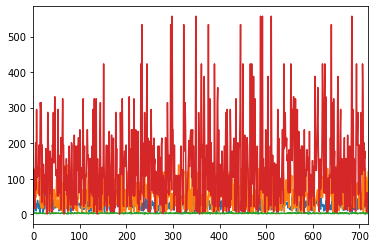

In [154]:
%matplotlib inline
df_2['Rooms'].plot(),df_2['crime_C_average'].plot(),df_2['travel_min_to_CBD'].plot(),df_2['Age'].plot()

But After Scaling all the columns seems to be evenly distributed.

(<matplotlib.axes._subplots.AxesSubplot at 0x23a96c749b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x23a96c749b0>)

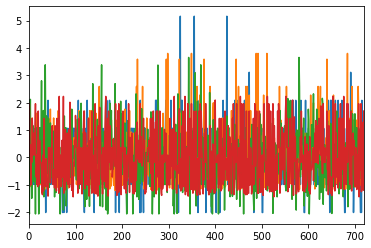

In [156]:
df_2['room_scaled'].plot(),df_2['crime_C_average_scaled'].plot(),df_2['travel_min_to_CBD_scaled'].plot(),df_2['Age_scaled'].plot()

## Conclusion 

Some of the key steps done in this project are:

**Task 1**
1. Read all the shape files and peform the necessary validations.
2. Read the property file (29858186.csv) and peform the necessary validations.
3. Read Councils file and perform all the necessary validations.
4. Read the Crime file and perform all the necessary validations.
5. Read all the GTS files and perform all the necessary validations.
6. Integrate the data into a new dataframe.
7. Fixing Data if any and then storing it into output file.
**Task 2**
1. Data Transformation
2. Data scaling
3. Evidence in improvement for Linear model